# Attrition:- company losing its customer base
### Attrition is a process in which the workforce dwindles at a company, following a period in which a number of people retire or resign, and are not replaced.

In this NoteBook our Aim will be
- To analyze the datasets completely wrt each and feature and find the reason behind Attrition of Employees.
- what the top factors which lead to employee attrition?

### Import Python Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [2]:
HRdata = pd.read_excel("D:\Projects\HR Attrition\HR Data.xlsx")

### Basic Data Exploration Analysis (EDA)
- we will check the shape of the dataset
- we will check the head, tail, and sample of the datasets
- we will check the Data Description
- we will check the Data Types of the columns present in the data.

In [3]:
pd.set_option('display.max_columns',None)
HRdata.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,33,1,1392,3,Masters Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,27,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


In [4]:
HRdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [5]:
HRdata.describe()

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Observations
- we have int and string data type 
- we have no missing data, if not so then we would have to impute the values, if possible, if not then we have no option to drop that column
- our traget attrition is objecct type and therefore we need to convert them into neumerical data type

### Target Value (Attrition)

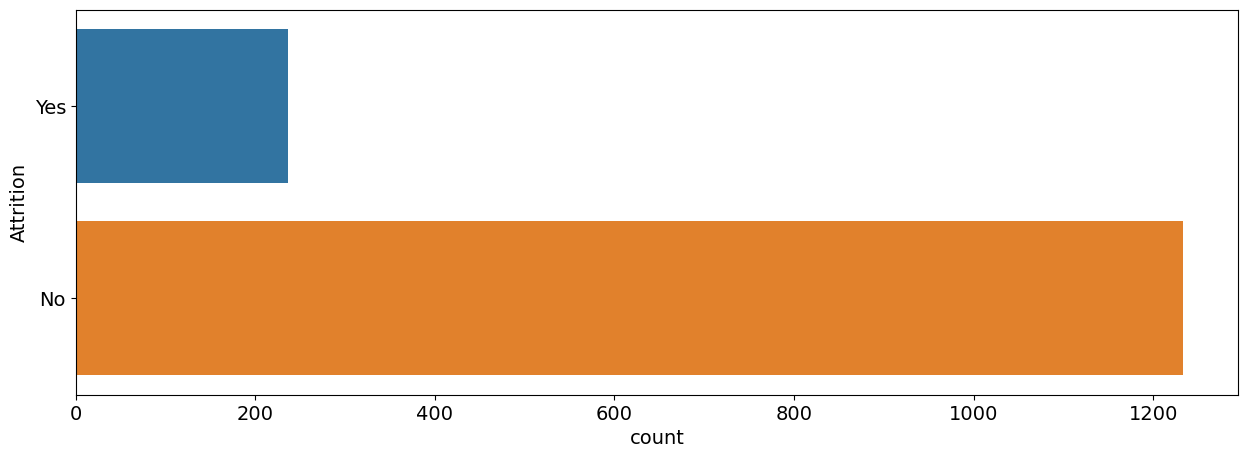

In [6]:
plt.figure(figsize=(15,5))
plt.rc("font", size=14)
sns.countplot(y ='Attrition',data=HRdata)
plt.show()

Here we can see that target column is highly imbalanced 

### Exploratory Data Analysis

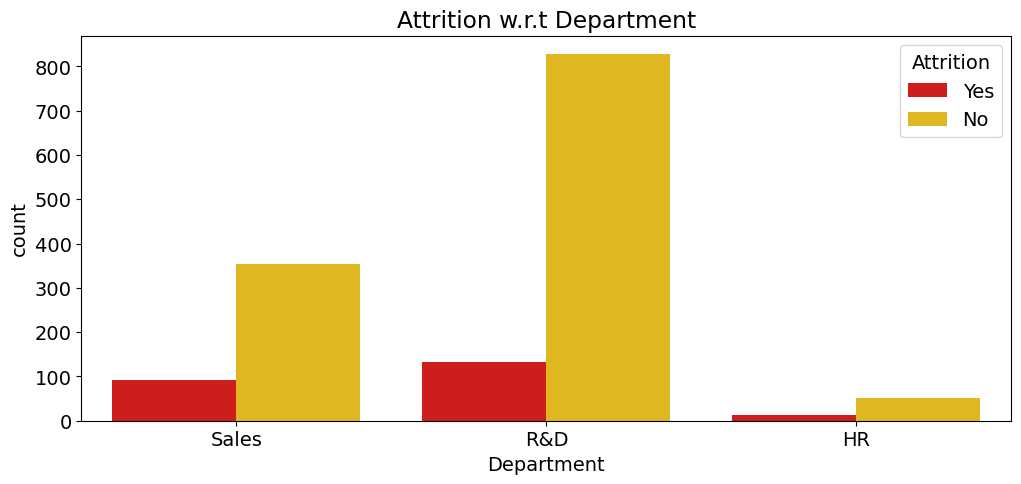

In [7]:
# Department wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition', data=HRdata, palette='hot')
plt.title("Attrition w.r.t Department")
plt.show()

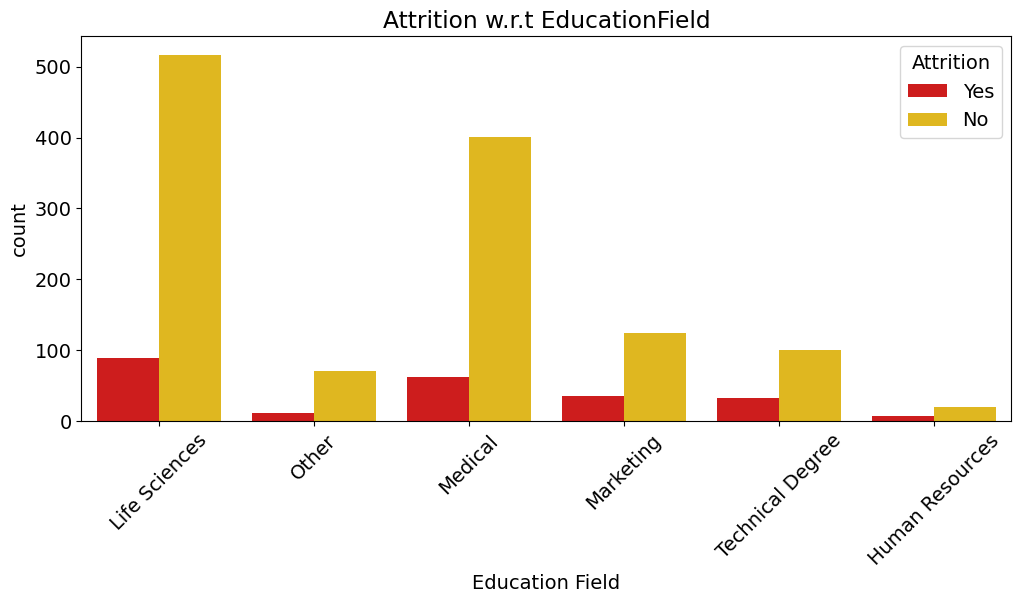

In [8]:
# Education Field wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Education Field',hue='Attrition', data=HRdata, palette='hot')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

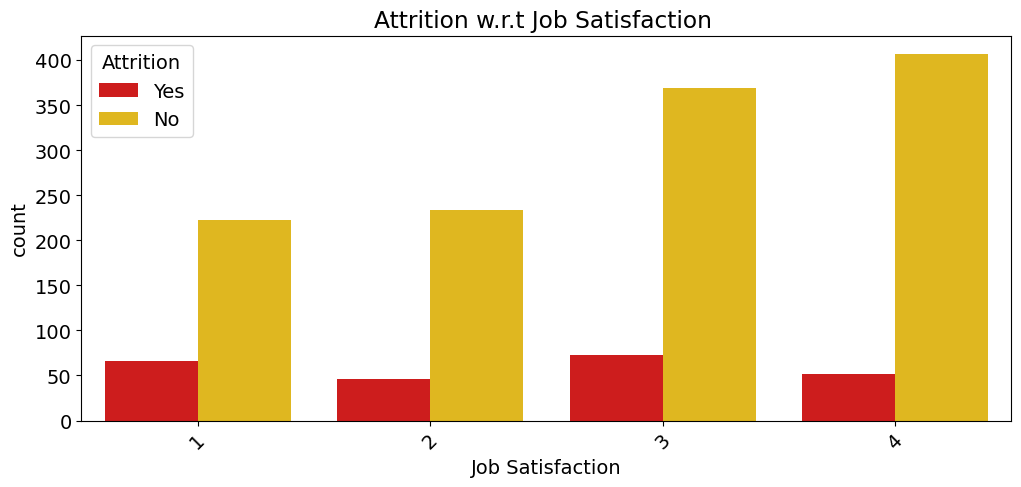

In [9]:
# Job Satisfaction wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Job Satisfaction',hue='Attrition', data=HRdata, palette='hot')
plt.title("Attrition w.r.t Job Satisfaction ")
plt.xticks(rotation=45)
plt.show()

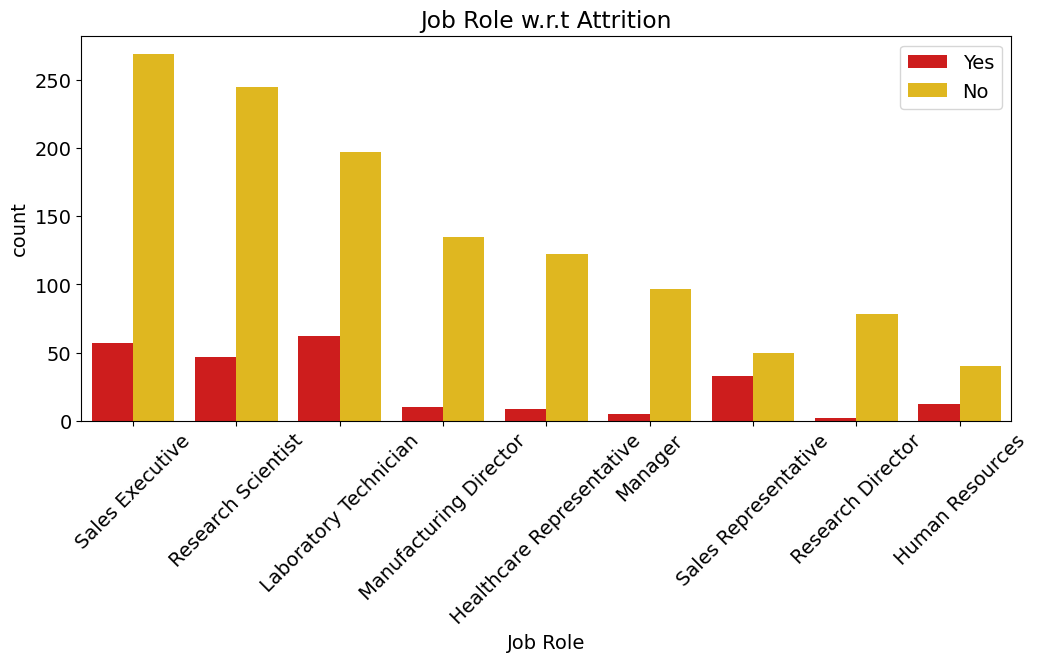

In [10]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(12,5))
sns.countplot(x='Job Role',hue='Attrition', data=HRdata, palette='hot')
plt.title("Job Role w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show() 

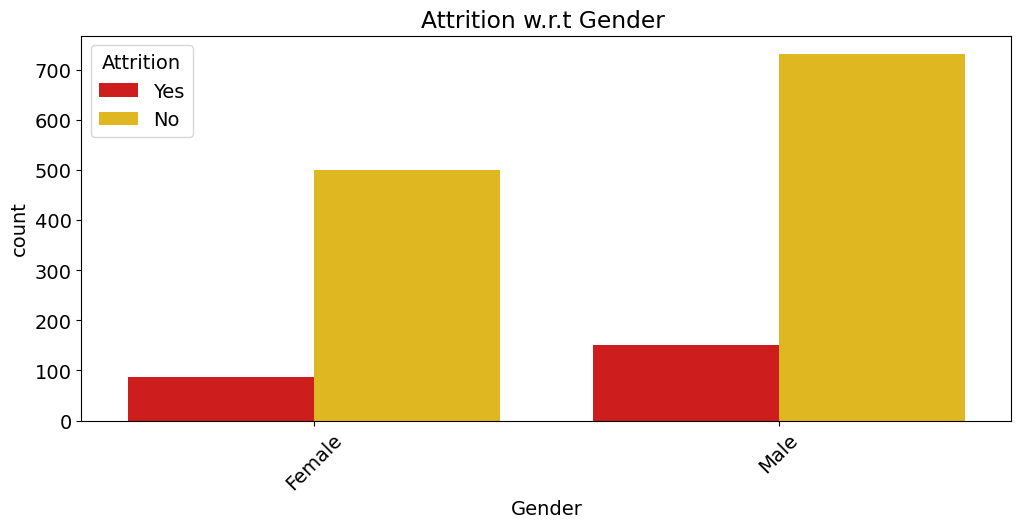

In [11]:
# Gender wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition', data=HRdata, palette='hot')
plt.title("Attrition w.r.t Gender ")
plt.xticks(rotation=45)
plt.show()

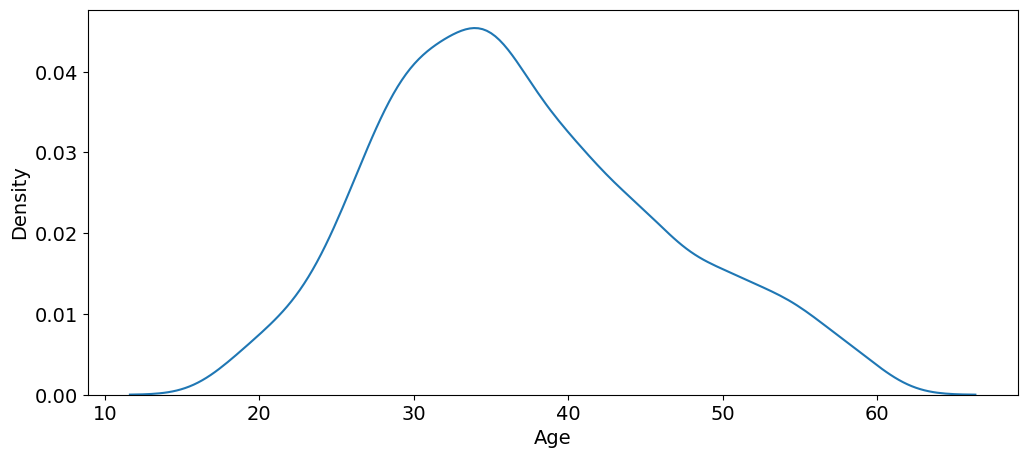

In [12]:
# distribution of age
plt.figure(figsize=(12,5))
sns.distplot(HRdata['Age'],hist=False)
plt.show()

- Age column is very well normalized, most of employees are age between 25 to 40.
- we are having some of the numerical columns which are lebel encoded for us, they are ordinal labels, so let's have a look at them first

In [13]:
ordinal_features = ['Education','Environment Satisfaction','Job Involvement','Job Satisfaction',
                    'Performance Rating','Relationship Satisfaction','Work Life Balance']
HRdata[ordinal_features].head()

,Education,Environment Satisfaction,Job Involvement,Job Satisfaction,Performance Rating,Relationship Satisfaction,Work Life Balance
0,Associates Degree,2,3,4,3,1,1
1,High School,3,2,2,4,4,3
2,Associates Degree,4,2,3,3,2,3
3,Masters Degree,4,3,3,3,3,3
4,High School,1,3,2,3,4,3


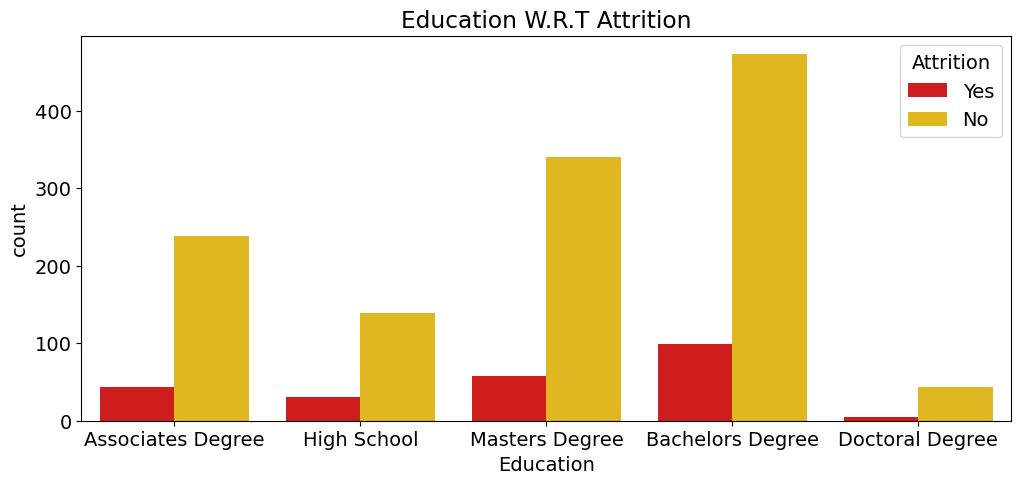

In [14]:
# Education wrt Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue='Attrition', data=HRdata, palette='hot')
plt.title("Education W.R.T Attrition")
plt.show()

### OBSERVATIONS

- Employees from Bachelor are more, then from Masters background. Attrition wrt to bachelor can be seem more because they have more and more expectation from companies.

### Label Encodeing

In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. and for the machine we need to change them into numbers

In [15]:
# Target Variable(Attrition)
HRdata['Attrition'] = HRdata['Attrition'].replace({'No':0,'Yes':1})

In [16]:
#encode binary variables
HRdata['Over Time'] = HRdata['Over Time'].map({'No':0,'Yes':1})
HRdata['Gender'] = HRdata['Gender'].map({'Male':0,'Female':1})

In [17]:
# encode categorical columns which are ordinal, use labelEncoding
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder
encoding_cols=['Business Travel','Education','Department','Education Field','Job Role','Marital Status']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    HRdata[column] = label_encoders[column].fit_transform(HRdata[column])

In [18]:
# look at the final data
HRdata.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,2,35 - 44,Ex-Employees,2,1,STAFF-1,1,1,7,2,1,Y,0,41,0,1102,1,0,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,0,1,45 - 54,Current Employees,1,1,STAFF-2,2,0,6,1,0,Y,3,49,1,279,8,3,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,1,2,35 - 44,Ex-Employees,1,4,STAFF-4,4,0,2,2,1,Y,3,37,0,1373,2,0,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,0,1,25 - 34,Current Employees,1,1,STAFF-5,5,1,6,1,1,Y,3,33,1,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,0,2,25 - 34,Current Employees,1,3,STAFF-7,7,0,2,1,0,Y,3,27,1,591,2,3,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


Here we can remove some columns like CF_age band, CF_attrition label, emp no and Over18

In [19]:
HRdata.drop(columns = ["CF_age band","CF_attrition label","CF_current Employee","emp no","Over18"], inplace = True)

In [20]:
HRdata.head()

,Attrition,Business Travel,Department,Education Field,Employee Number,Gender,Job Role,Marital Status,Over Time,Training Times Last Year,Age,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,2,2,1,1,1,7,2,1,0,41,1102,1,0,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,0,1,1,1,2,0,6,1,0,3,49,279,8,3,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,1,2,1,4,4,0,2,2,1,3,37,1373,2,0,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,0,1,1,1,5,1,6,1,1,3,33,1392,3,4,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,0,2,1,3,7,0,2,1,0,3,27,591,2,3,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


### Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [21]:
X = HRdata.drop(['Attrition'], axis=1)
y = HRdata['Attrition'].values

### Resampling
Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques

- We are going to use Over Sampling.
- We will not use Under Sampling to avoid data loss.

In [22]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [23]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [24]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 33)
(1972,)
(494, 33)
(494,)


# Logistic Regression

Logistic Regression is a fundamental machine learning algorithm used for binary classification tasks, where the goal is to predict the probability that an instance belongs to a particular class. 
Logistic Regression is a versatile algorithm that can handle both linear and non-linear relationships between the features and the target variable. While it's commonly used for binary classification, it can be extended to handle multi-class classification tasks through techniques like one-vs-rest or multinomial logistic regression.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))
cnf_matrix

Accuracy Score - 0.6437246963562753


array([[155,  92],
       [ 84, 163]], dtype=int64)

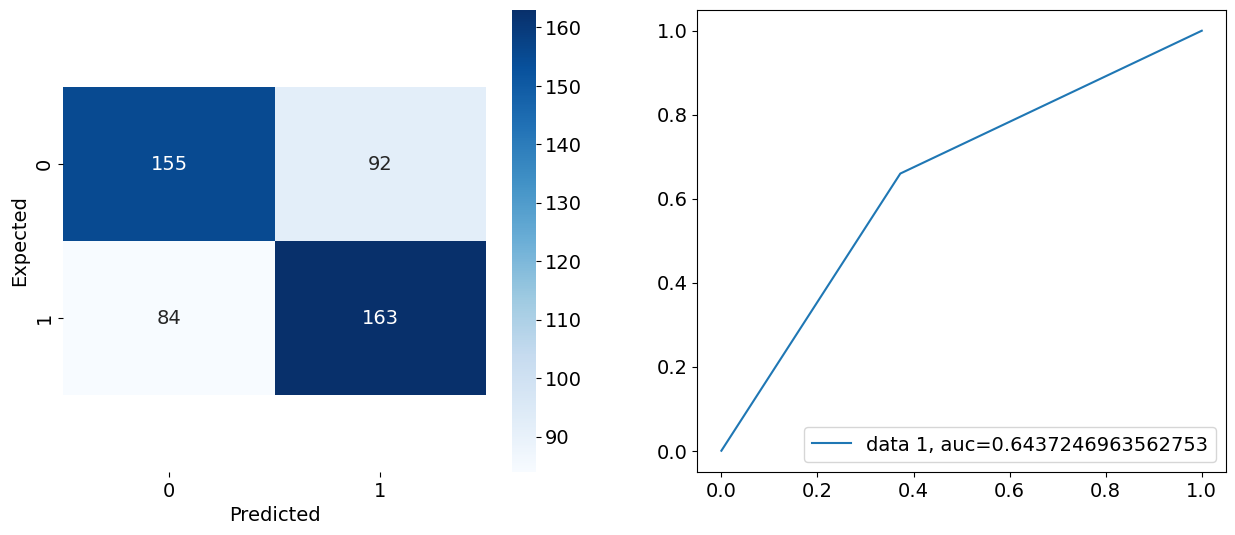

In [28]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Lets so a Feature Selection to improve the accuracy

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SelectKBest with chi-square test**

SelectKBest with chi-square test is a feature selection technique that evaluates the relationship between each feature and the target variable using the chi-square statistical test, selecting the top k features with the highest chi-square scores.

In [30]:
# Perform feature selection using SelectKBest with chi-square test
k = 10 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [31]:
# Train a logistic regression model on the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Predict on the testing data using the model
y_pred = model.predict(X_test_selected)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("precision:", precision)

Accuracy: 0.8605442176870748
precision: 0.0


As we can see that feature selection may have improved the accuracy but the precision is 0.0. This scenario typically occurs when the model predicts the negative class for all instances, resulting in a precision of 0.0 for the positive class. It suggests that the model is overly conservative or biased towards predicting the majority class (negative class) and fails to identify any instances of the positive class.

To overcome this lets first check the features it has included

In [32]:
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]
feature_importance = model.coef_[0]
sorted_indices = np.argsort(np.abs(feature_importance))[::-1]  # Sort indices by absolute feature importance
sorted_features = selected_feature_names[sorted_indices]
sorted_importance = feature_importance[sorted_indices]
print("Feature Importance:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(feature, ":", importance)

Feature Importance:
Years In Current Role : -0.07562578434392693
Years With Curr Manager : -0.06610540365882617
Over Time : 0.0439779030853173
Age : -0.016479670001227936
Distance From Home : 0.016290990858865713
Years At Company : -0.013585294382046413
Total Working Years : 0.007753479228316799
Daily Rate : -0.00030988358343487723
Monthly Income : -8.064514417617204e-05
Monthly Rate : -5.857216526652871e-07


Here we notice that all the weights for the feature is proportional to the attrition chance for eg: lets take "over time", higher the over time more likely that he/she may leave the company hence a positive co-relation where as for "Monthly Income", higher the monthly income less likely to leave the company hence negetive co-relation  

Since the feature co-relations are correct lets try to hyper-parameterize the model and change the cut-off treshold and see how the model fares

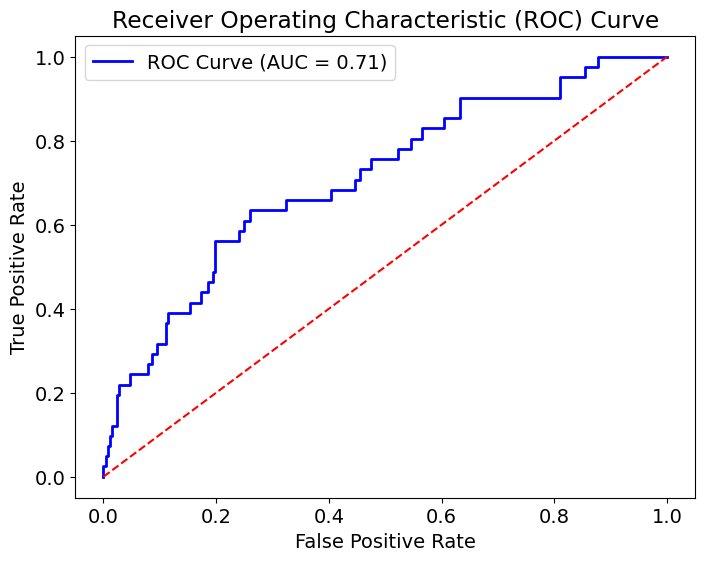

In [33]:
# Calculate probabilities for class 1 (assuming 'y_pred_proba' contains probabilities)
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**observations**

An ROC curve (Receiver Operating Characteristic curve) with an AUC (Area Under the Curve) of 0.71 indicates the performance of the binary classification model in distinguishing between the positive and negative classes.

The AUC value ranges from 0 to 1, where a score closer to 1 indicates better discrimination between the positive and negative classes. An AUC of 0.71 suggests that this model performs moderately well in distinguishing between the classes.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Solver algorithms
    'penalty': ['l1', 'l2'],  # Penalty types
}

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model on test set
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy: 0.891156462585034


Hyperparametization has improved the accuracy lets see other parameters

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'best_model' is your trained logistic regression model
# Assuming 'X_test' contains the features of your test set and 'y_test' contains the corresponding true labels

# Predict probabilities of positive class
predicted_probabilities = best_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
predicted_labels = (predicted_probabilities >= 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8461538461538461
Recall: 0.2682926829268293
F1-Score: 0.4074074074074075


From the best model using hyperparameterization we see that it has improved in precision but the recall values is too low. Recall by definition measures the proportion of actual positive instances that were correctly identified by the model. In this scenario recall value of approximately 0.268 suggests that the model is able to correctly identify about 26.8% of all actual churn cases. 

So now lets try to change the treshold value and see how the reccall fares

In [36]:
predicted_probabilities = best_model.predict_proba(X_test)[:, 1]

In [37]:
# Define new threshold (Randomly)
new_threshold = 0.22  # Example threshold, adjust as needed

# Apply new threshold to predicted probabilities
predicted_labels = (predicted_probabilities >= new_threshold).astype(int)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
roc_auc = roc_auc_score(y_test, predicted_probabilities)

print("Performance with New Threshold:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

Performance with New Threshold:
Accuracy: 0.8095238095238095
Precision: 0.3972602739726027
Recall: 0.7073170731707317
F1-Score: 0.5087719298245613
ROC-AUC: 0.8287862720524438


Reducing the threshold to 0.2 has led to significant changes in the performance metrics of this logistic regression model. 

- The accuracy of the model has decreased to approximately 80.95%. This decrease in accuracy is expected when the threshold is lowered because more instances are classified as positive, which can lead to more false positives.

- The precision of the model has decreased to approximately 0.397. This decrease indicates that a larger proportion of the positive predictions made by the model are incorrect (false positives). However, it's worth noting that precision and recall have a trade-off relationship, so increasing recall often comes at the expense of precision.

- The recall of the model has increased substantially to approximately 0.707. This increase indicates that the model is now better at correctly identifying positive instances (churn cases). A higher recall means that fewer positive instances are missed (fewer false negatives).

- The F1-score has increased to approximately 0.509. The increase in precision and relatively stable recall has contributed to this improvement in the harmonic mean of precision and recall. A higher F1-score indicates a better balance between precision and recall.

- The ROC-AUC score has also increased to approximately 0.829. This indicates that the model's ability to discriminate between positive and negative instances has improved with the lower threshold.

hence this is the best model for now to support the current data and make predictions

### Insights / Suggestions

From the above analysis we see that in term of modelling the system identified top 10 factors that effect the attrition rate in a company which are as follows:

Feature Importance:
Years In Current Role : -0.07562578434392693
Years With Curr Manager : -0.06610540365882617
Over Time : 0.0439779030853173
Age : -0.016479670001227936
Distance From Home : 0.016290990858865713
Years At Company : -0.013585294382046413
Total Working Years : 0.007753479228316799
Daily Rate : -0.00030988358343487723
Monthly Income : -8.064514417617204e-05
Monthly Rate : -5.857216526652871e-07

Notice that some have positive coeffiecient and some have negetive coefficient form the above table we can see that ones with the positive co-efficeients are the reasons for the employee to swtich to a new company where as ones with the negetive co-efficients are the reasons which make the employee continue working for the comapany.

Working on reducing the factors with negetive co-efficient and increasing the values of positive co-efficient will reduce the attrition rate.

Personal note: I would have liked to have data to contain a column which indicate the average market salary as we see the highest co-efficient is of Monthly Income. comparing those with the average market salary the model would have better understanding of the attrition rate. for eg an employee who is underpaid wrt to average market rate is more likely to lleave the company. 

But we need to be cautious as increasing the monthly income will increase the average market salary too. 